In [12]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [69]:
%pylab inline
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.cm as cm
import seaborn as sns

import sklearn
from sklearn import cluster
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples, silhouette_score

from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage

# Populate pandas dataframes
df = pd.read_pickle('../parsed_data/cosim_montreal.pkl')
# df = pd.read_pickle('../parsed_data/cosim_pittsburgh.pkl')
# df = pd.read_pickle('../parsed_data/cosim_edinburgh.pkl')

# Create numpy arrays of data frames
# montr_data = np.array(df_montr.ix[:,7:])
# pitts_data = np.array(df_pitts.ix[:,7:])
# edinb_data = np.array(df_edinb.ix[:,7:])

Populating the interactive namespace from numpy and matplotlib


In [72]:
# df = df[df.stars > 3]
data = np.array(df.ix[:,6:])
len(df)

621

### Silhouette score for K-Means Clustering

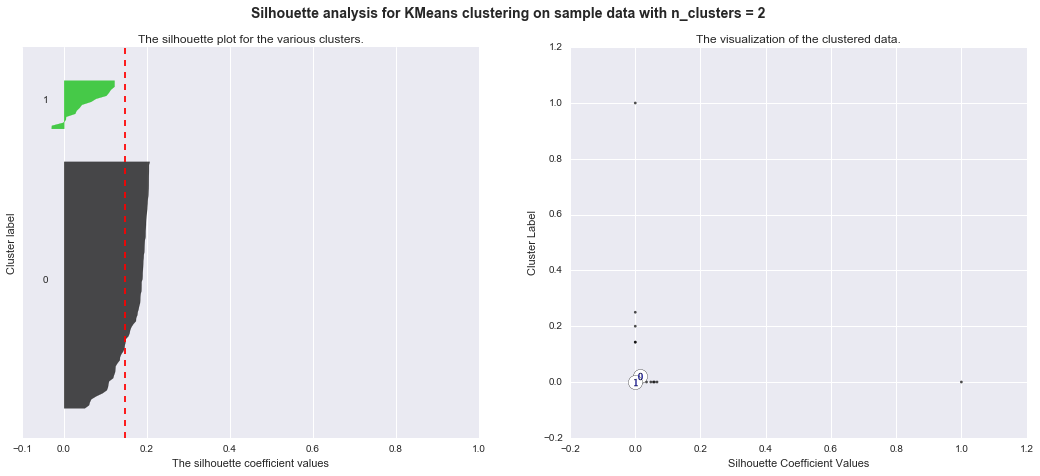

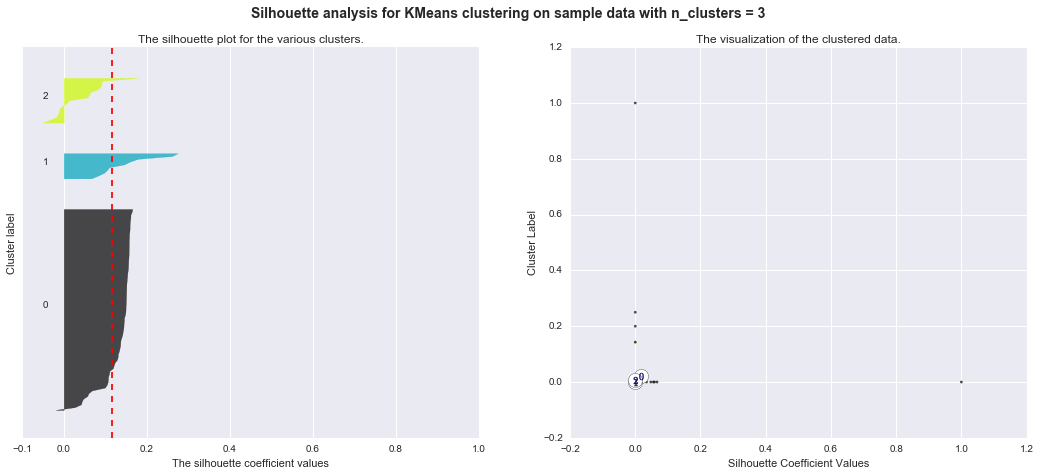

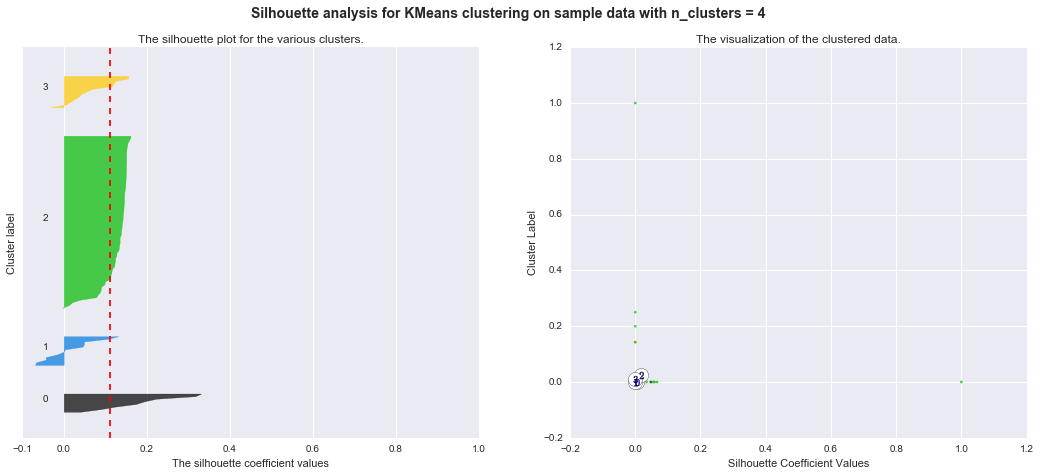

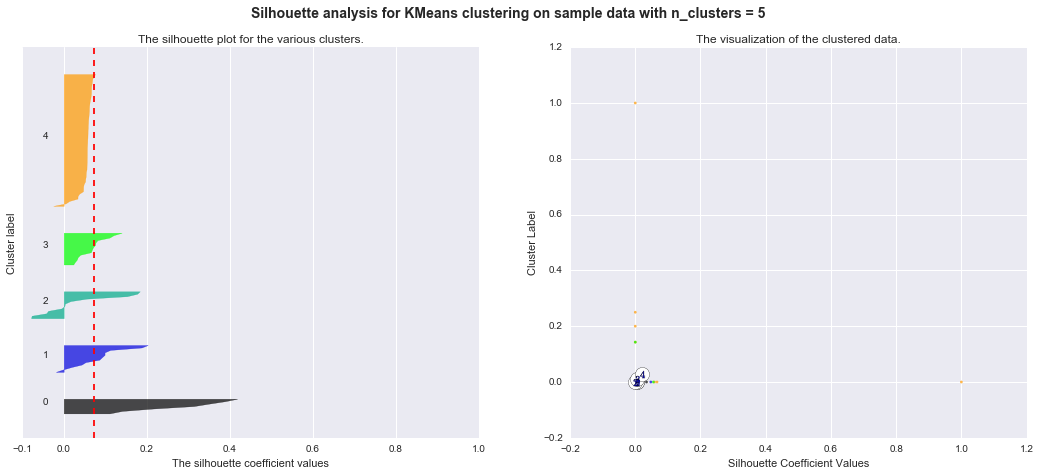

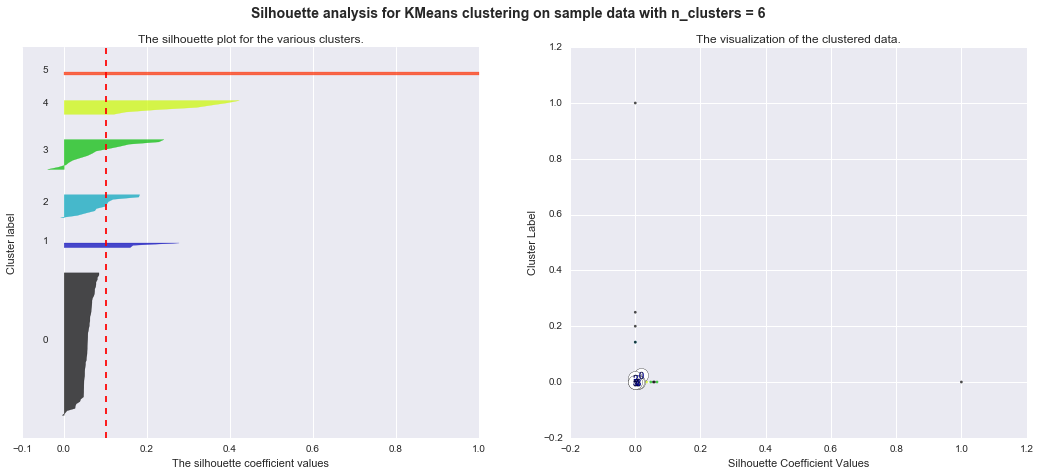

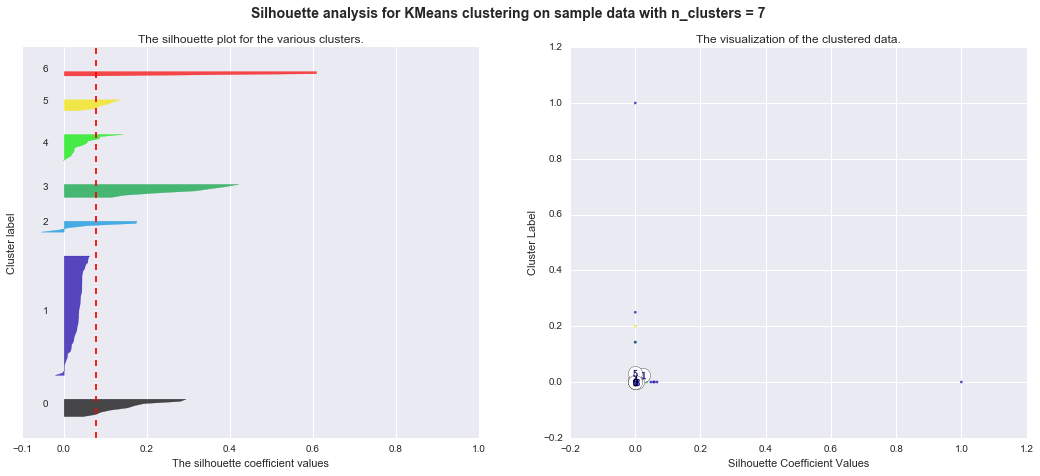

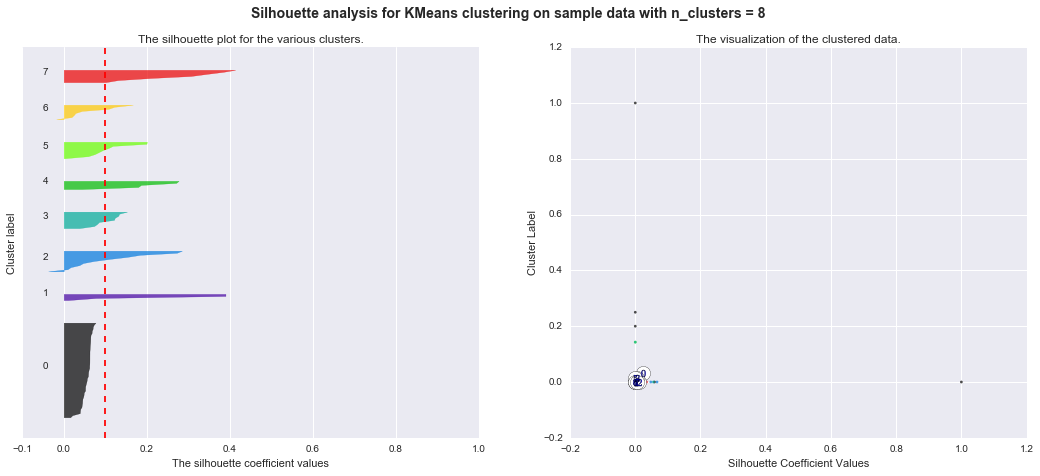

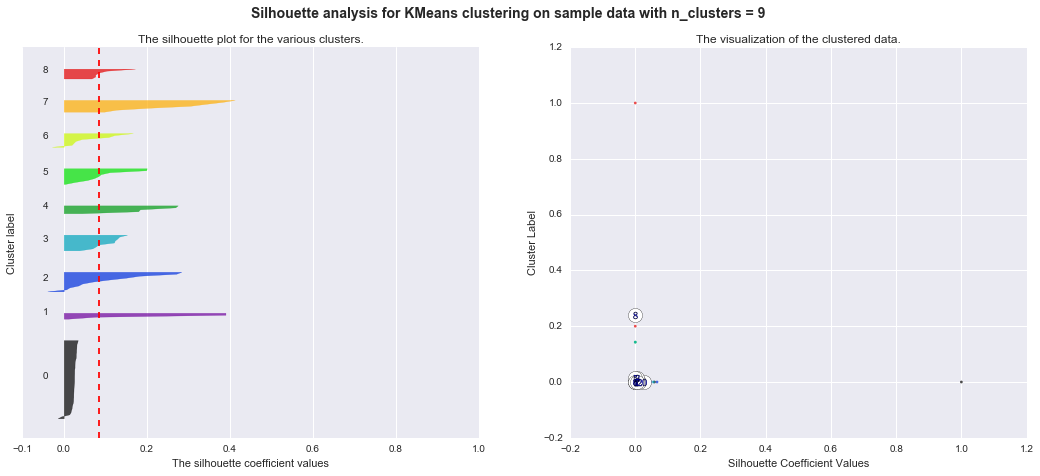

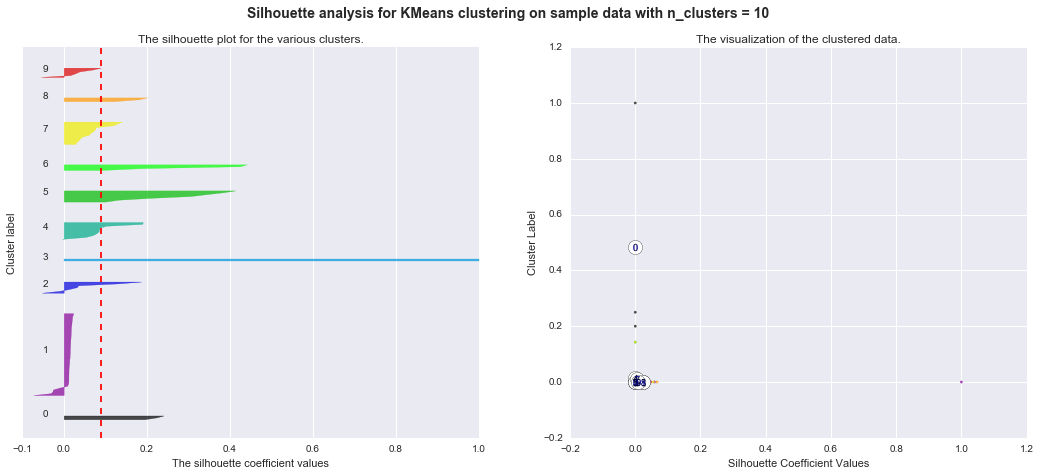

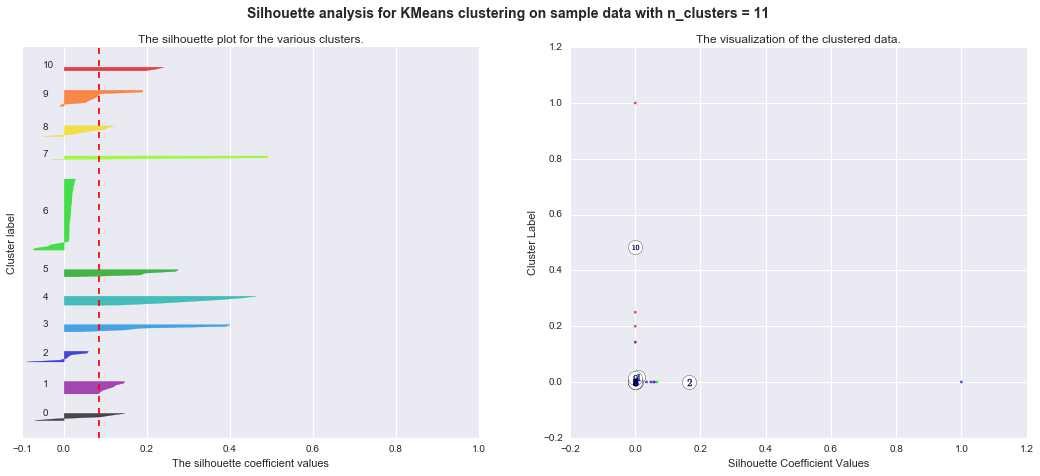

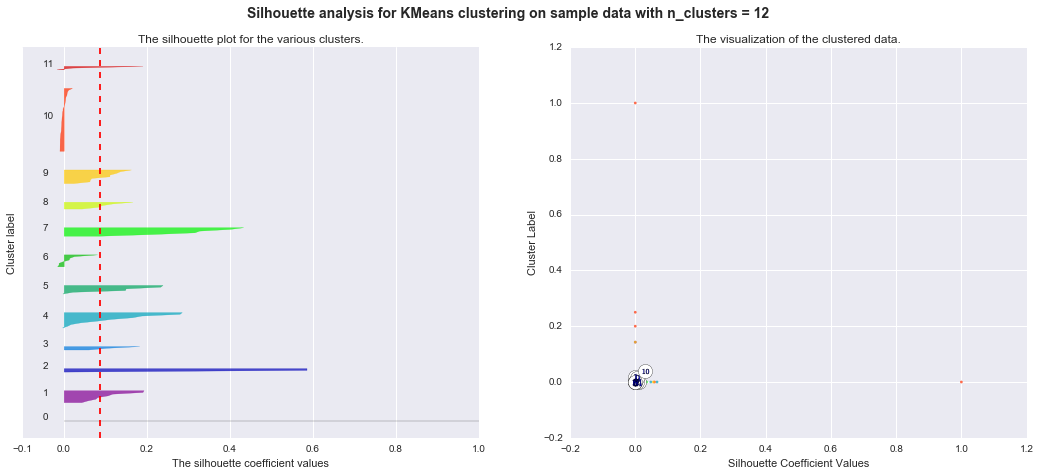

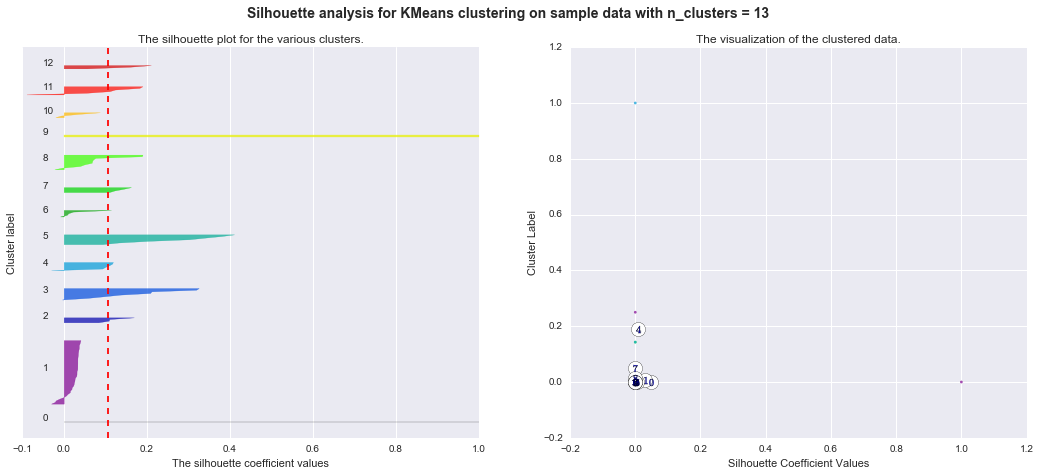

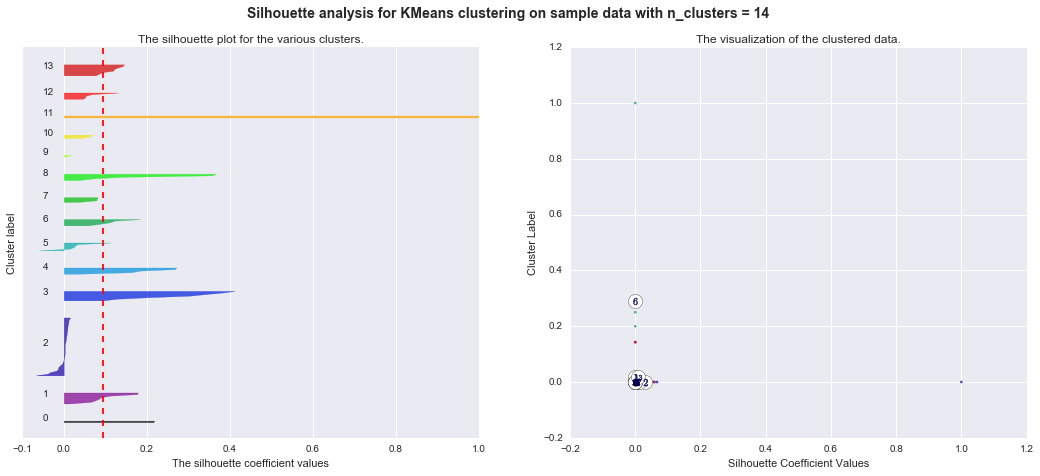

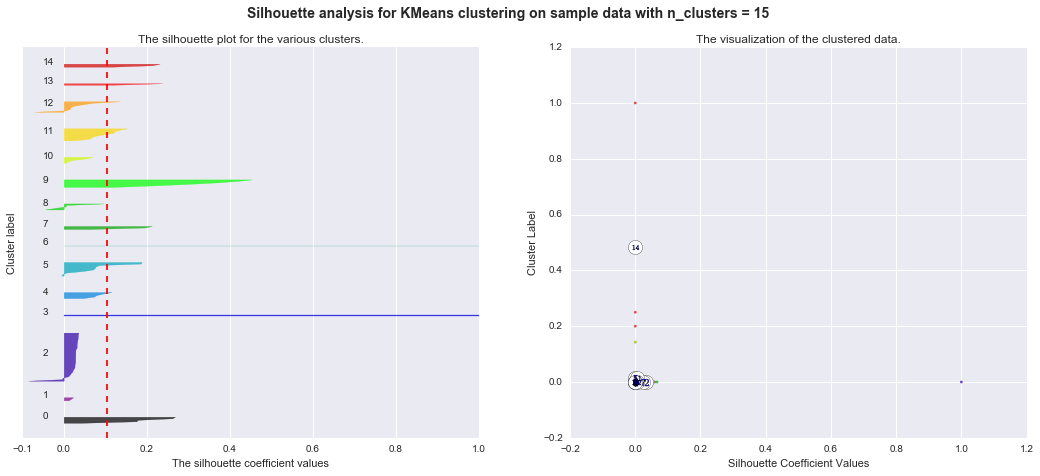

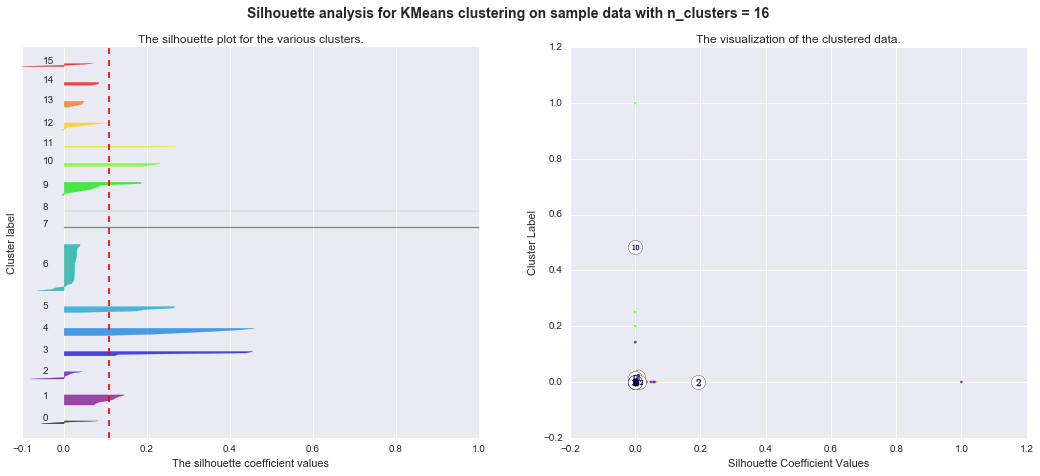

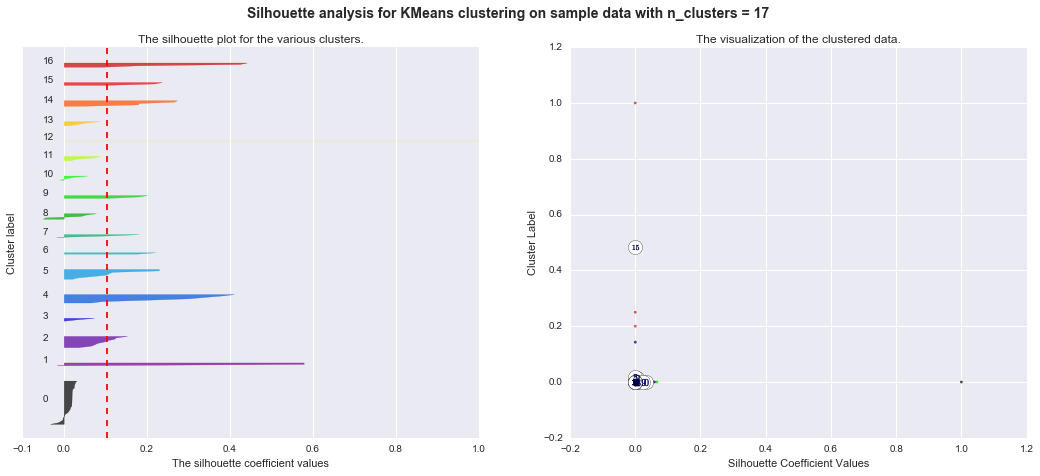

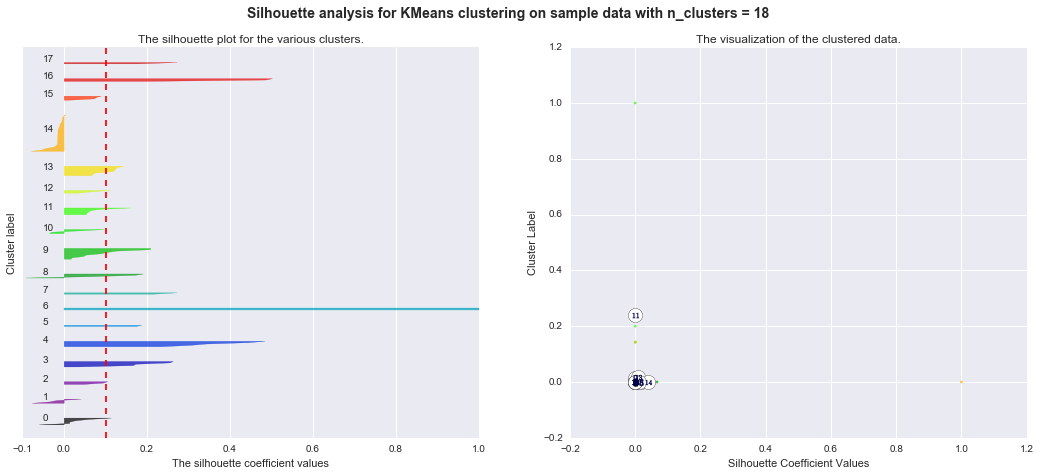

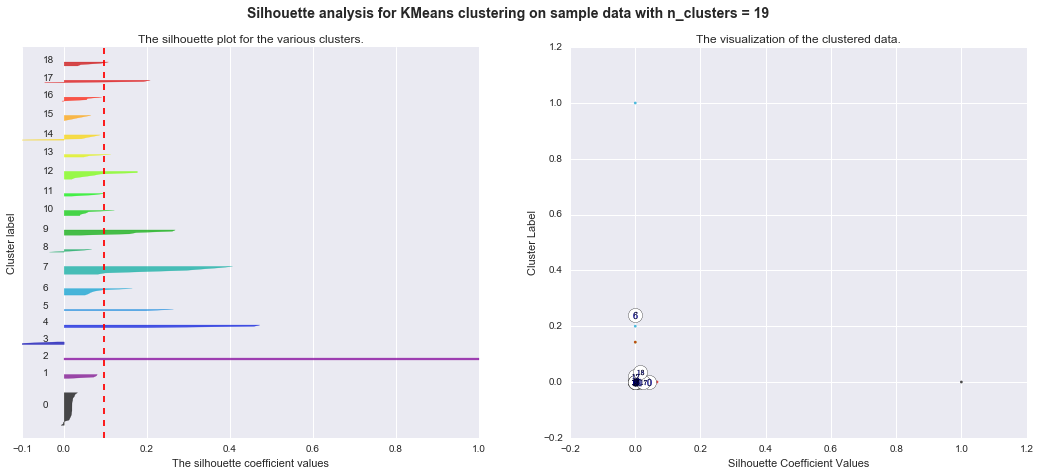

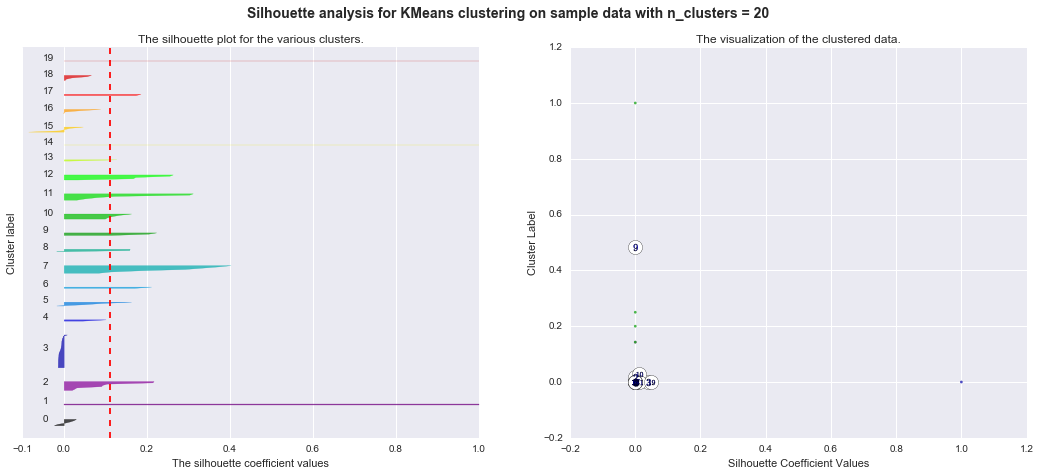

In [36]:
# Loop through values for k ranging from 1 to 10 to calcualte the silhouette score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sklearn.metrics.silhouette_score(data, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)
    
    y_lower = 10

    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data[:, 0], data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    
    plt.xlabel("Silhouette Coefficient Values")
    plt.ylabel("Cluster Label")
    plt.show()


In [35]:
# Loop through values for k ranging from 1 to 10 to calcualte the silhouette score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sklearn.metrics.silhouette_score(data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

('For n_clusters =', 2, 'The average silhouette_score is :', 0.14845217665656557)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.11751197952934239)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.11076326182511007)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.071827209136299211)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.10143339584050524)
('For n_clusters =', 7, 'The average silhouette_score is :', 0.07829094943166498)
('For n_clusters =', 8, 'The average silhouette_score is :', 0.098478183446248244)
('For n_clusters =', 9, 'The average silhouette_score is :', 0.085944865038341978)
('For n_clusters =', 10, 'The average silhouette_score is :', 0.089969180559278564)


### K Means Clustering

In [76]:
# Compute the K Nearest Neighbours
# K-Means for k=8
n_clusters = 8
k_means = cluster.KMeans(n_clusters = n_clusters, init = 'k-means++')
k_means.fit(data) # Computes k-means

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [77]:
df['kmean_index'] = k_means.labels_
# output_df = df.drop(df.ix[:,6:-1])

In [79]:
output_df = df[['business_id', 'text', 'date', 'city', 'latitude', 'longitude', 'kmean_index']]
# output_df

### Hierarchical dendrogram

In [32]:
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

# Generate the linkage matrices for different combinations of linkage type and distance metrics
# Distance metrics: Euclidean and Squared Euclidean
# Linkage type: Single and Weighted
Z_eucl_sgle = linkage(data, method='single', metric='euclidean') 
Z_eucl_wght = linkage(data, method='weighted', metric='euclidean')
Z_sqeucl_sgle = linkage(data, method='single', metric='sqeuclidean')
Z_sqeucl_wght = linkage(data, method='weighted', metric='sqeuclidean')

In [33]:
# Looking at the first 5 iterations
Z_eucl_sgle[:5]  # the resulting array has the format [idx1, idx2, dist, sample_count]

array([[  75.     ,   78.     ,    0.     ,    2.     ],
       [  64.     ,   67.     ,    0.4072 ,    2.     ],
       [  18.     ,   23.     ,    0.50247,    2.     ],
       [  22.     ,  102.     ,    0.80537,    3.     ],
       [  57.     ,   91.     ,    0.9598 ,    2.     ]])

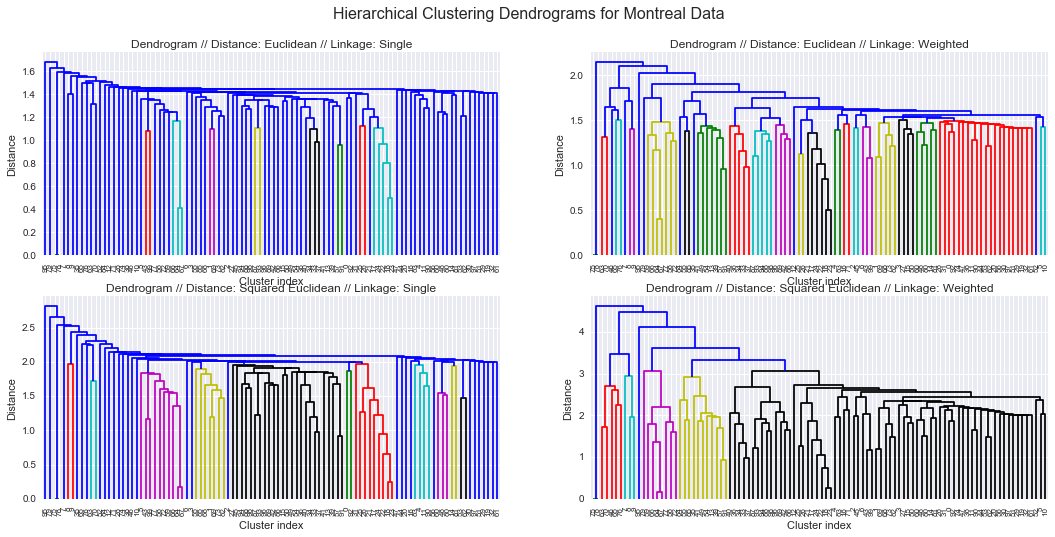

In [34]:
## Generate Dendrogram

# Set the frame for the whole Plot
fig = plt.figure(figsize=(18,8), dpi=1800)
fig.suptitle("Hierarchical Clustering Dendrograms for Montreal Data", fontsize=16)


# Compute dendrogram for: // Distance: Euclidean // Linkage: Single
ax1 = fig.add_subplot(2, 2, 1) # rows, columns, plot nb.
dendrogram(
    Z_eucl_sgle,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
ax1.set_title('Dendrogram // Distance: Euclidean // Linkage: Single')
ax1.set_xlabel('Cluster index')
ax1.set_ylabel('Distance')

# Compute dendrogram for: // Distance: Euclidean // Linkage: Weighted
ax2 = fig.add_subplot(2, 2, 2) # rows, columns, plot nb.
dendrogram(
    Z_eucl_wght,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
ax2.set_title('Dendrogram // Distance: Euclidean // Linkage: Weighted')
ax2.set_xlabel('Cluster index')
ax2.set_ylabel('Distance')

# Compute dendrogram for: // Distance: Squared Euclidean // Linkage: Single
ax3 = fig.add_subplot(2, 2, 3) # rows, columns, plot nb.
dendrogram(
    Z_sqeucl_sgle,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
ax3.set_title('Dendrogram // Distance: Squared Euclidean // Linkage: Single')
ax3.set_xlabel('Cluster index')
ax3.set_ylabel('Distance')


# Compute dendrogram for: // Distance: Squared Euclidean // Linkage: Weighted
ax4 = fig.add_subplot(2, 2, 4) # rows, columns, plot nb.
dendrogram(
    Z_sqeucl_wght,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
ax4.set_title('Dendrogram // Distance: Squared Euclidean // Linkage: Weighted')
ax4.set_xlabel('Cluster index')
ax4.set_ylabel('Distance')


# fig.tight_layout()
plt.show()